<a href="https://colab.research.google.com/github/thoxinloi/ai/blob/main/Fuzzy_Logic_W5_3_3_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 14.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894086 sha256=875da513abb419149b6964bdbbba4b6de3342b121d4895952348a79c05e9ce48
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


In [4]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

In [5]:
# Anteceden
taste = ctrl.Antecedent(np.arange(0,10.1,0.1), 'taste')
environment = ctrl.Antecedent(np.arange(0,10.1,0.1), 'environment')
budget = ctrl.Antecedent(np.arange(0,5001,1), 'budget')
location = ctrl.Antecedent(np.arange(0,3,0.1), 'location')
user_review = ctrl.Antecedent(np.arange(0,5.1,0.1), 'user_review')
preference = ctrl.Consequent(np.arange(0,9.1,0.1), 'preference')

In [6]:
# Taste memberships
taste['Low']=fuzz.gaussmf(taste.universe,0,2.5)
taste['Medium']=fuzz.gaussmf(taste.universe,5,2)
taste['High']=fuzz.gaussmf(taste.universe,10,2.5)
#taste.view()

# Environment memberships
environment['Low']=fuzz.gaussmf(environment.universe,0,2.5)
environment['Medium']=fuzz.gaussmf(environment.universe,5,2)
environment['High']=fuzz.gaussmf(environment.universe,10,2.5)
#environment.view()

# Budget memberships
budget['Low']=fuzz.gaussmf(budget.universe,0,1250)
budget['Medium']=fuzz.gaussmf(budget.universe,2500,1000)
budget['High']=fuzz.gaussmf(budget.universe,5000,1250)
#budget.view()

# Location memberships
location['Low']=fuzz.gaussmf(location.universe,0,0.75)
location['Medium']=fuzz.gaussmf(location.universe,1.5,0.5)
location['High']=fuzz.gaussmf(location.universe,3,0.75)
#location.view()

# user_review memberships
user_review['Low']=fuzz.gaussmf(user_review.universe,0,1.25)
user_review['Medium']=fuzz.gaussmf(user_review.universe,2.5,1)
user_review['High']=fuzz.gaussmf(user_review.universe,5,1.25)
#user_review.view()

# Preference memberships
preference['Lv1'] = fuzz.trimf(preference.universe, [0,1.5,3])
preference['Lv2'] = fuzz.trimf(preference.universe, [1.5,3,4.5])
preference['Lv3'] = fuzz.trimf(preference.universe, [3,4.5,6])
preference['Lv4'] = fuzz.trimf(preference.universe, [4.5,6,7.5])
preference['Lv5'] = fuzz.trimf(preference.universe, [6,7.5,9])
#preference.view()

In [7]:
#Tạo luật
rule = []

#Học các rule
index = ['Low', 'Medium', 'High']
level = ['Lv1','Lv2','Lv3','Lv4','Lv5']
count=0
for a in index:
  for b in index:
    for c in index:
      for d in index:
        for e in index:
          rule.append(ctrl.Rule(taste[a]&environment[b]&budget[c]&location[d]&user_review[e], preference[level[count]]))
          if (a=='Low') and (b=='Low') and (c=='Medium'):
            count=1
          if (a=='Low') and (b=='Medium') and (c=='Medium'):
            count=2
          if (a=='Medium') and (b=='High') and (c=='Medium'):
            count=3
          if (a=='High') and (b=='High') and (c=='Medium'):
            count=4
#Học các rule
preference_control = ctrl.ControlSystem(rule[:])

5.207434819505782


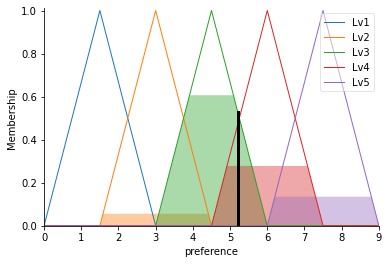

In [8]:
#Simulation
preference_simulation = ctrl.ControlSystemSimulation(preference_control)
preference_simulation.input['taste'] = 6
preference_simulation.input['environment'] = 9
preference_simulation.input['budget'] = 500
preference_simulation.input['location'] = 1
preference_simulation.input['user_review'] = 4
preference_simulation.compute()
print(preference_simulation.output['preference'])
preference.view(sim=preference_simulation)

Lượng mưa trung bình: 1.9114446047779379


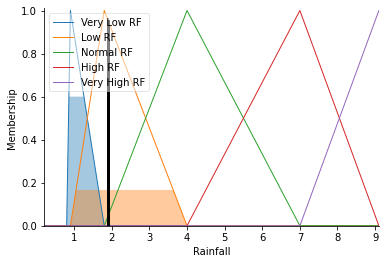

In [9]:
# Antecedent
Wind_speed = ctrl.Antecedent(np.arange(0.7,3.2,0.1),'Wind_speed')
Temperature = ctrl.Antecedent(np.arange(20.4,41.3,1),'Temperature')
Rainfall = ctrl.Consequent(np.arange(0.2,9.2,0.1),'Rainfall')

# Wind_speed memberships
Wind_speed['Very Low WS']= fuzz.trimf(Wind_speed.universe,[0.7,0.7,1.2])
Wind_speed['Low WS']= fuzz.trimf(Wind_speed.universe,[0.7,1.2,1.5])
Wind_speed['Normal WS']= fuzz.trimf(Wind_speed.universe,[1.2,1.5,2.5])
Wind_speed['High WS']= fuzz.trimf(Wind_speed.universe,[1.5,2.5,3.1])
Wind_speed['Very High WS']= fuzz.trimf(Wind_speed.universe,[2.5,3.1,3.1])
#Wind_speed.view()

# Temperature memberships
Temperature['Very Low TP']= fuzz.trimf(Temperature.universe,[20.4,20.4,25])
Temperature['Low TP']= fuzz.trimf(Temperature.universe,[20.4,25,30])
Temperature['Normal TP']= fuzz.trimf(Temperature.universe,[25,30,35])
Temperature['High TP']= fuzz.trimf(Temperature.universe,[30,35,41.2])
Temperature['Very High TP']= fuzz.trimf(Temperature.universe,[35,41.2,41.2])
# Temperature.view()

# Rainfall memberships
Rainfall['Very Low RF']= fuzz.trimf(Rainfall.universe,[0.9,0.9,1.8])
Rainfall['Low RF']= fuzz.trimf(Rainfall.universe,[0.9,1.8,4])
Rainfall['Normal RF']= fuzz.trimf(Rainfall.universe,[1.8,4,7])
Rainfall['High RF']= fuzz.trimf(Rainfall.universe,[4,7,9.1])
Rainfall['Very High RF']= fuzz.trimf(Rainfall.universe,[7,9.1,9.11])
#Rainfall.view()


rule1 = ctrl.Rule(Wind_speed['Very Low WS']& Temperature['Very Low TP'], Rainfall['Very Low RF'])
rule2 = ctrl.Rule(Wind_speed['Low WS']& Temperature['Low TP'], Rainfall['Very Low RF'])
rule3 = ctrl.Rule(Wind_speed['Normal WS']& Temperature['Normal TP'], Rainfall['Normal RF'])
rule4 = ctrl.Rule(Wind_speed['Normal WS']& Temperature['Very Low TP'], Rainfall['Normal RF'])
rule5 = ctrl.Rule(Wind_speed['Normal WS']& Temperature['High TP'], Rainfall['Low RF'])
rule6 = ctrl.Rule(Wind_speed['Normal WS']& Temperature['Low TP'], Rainfall['High RF'])
rule7 = ctrl.Rule(Wind_speed['Normal WS']& Temperature['Very High TP'], Rainfall['Low RF'])
rule8 = ctrl.Rule(Wind_speed['Very Low WS']& Temperature['Normal TP'], Rainfall['Low RF'])
rule9 = ctrl.Rule(Wind_speed['Low WS']& Temperature['Normal TP'], Rainfall['Low RF'])
rule10 = ctrl.Rule(Wind_speed['High WS']& Temperature['Normal TP'], Rainfall['Low RF'])
rule11= ctrl.Rule(Wind_speed['Very High WS']& Temperature['Normal TP'], Rainfall['Very Low RF'])
rule12 = ctrl.Rule(Wind_speed['Low WS']& Temperature['Very Low TP'], Rainfall['High RF'])
rule13 = ctrl.Rule(Wind_speed['High WS']& Temperature['Very Low TP'], Rainfall['Low RF'])
rule14 = ctrl.Rule(Wind_speed['Very High WS']& Temperature['Very Low TP'], Rainfall['Very High RF'])
rule15 = ctrl.Rule(Wind_speed['Very Low WS']& Temperature['Low TP'], Rainfall['High RF'])
rule16= ctrl.Rule(Wind_speed['High WS']& Temperature['Low TP'], Rainfall['Normal RF'])
rule17 = ctrl.Rule(Wind_speed['Very High WS']& Temperature['Low TP'], Rainfall['Very High RF'])
rule18 = ctrl.Rule(Wind_speed['Very Low WS']& Temperature['High TP'], Rainfall['Low RF'])
rule19 = ctrl.Rule(Wind_speed['Low WS']& Temperature['High TP'], Rainfall['Very Low RF'])
rule20 = ctrl.Rule(Wind_speed['High WS']& Temperature['High TP'], Rainfall['Low RF'])
rule21= ctrl.Rule(Wind_speed['Very High WS']& Temperature['High TP'], Rainfall['Very Low RF'])
rule22 = ctrl.Rule(Wind_speed['Very Low WS']& Temperature['Very High TP'], Rainfall['Very Low RF'])
rule23 = ctrl.Rule(Wind_speed['Low WS']& Temperature['Very High TP'], Rainfall['Very Low RF'])
rule24 = ctrl.Rule(Wind_speed['High WS']& Temperature['Very High TP'], Rainfall['Very Low RF'])
rule25 = ctrl.Rule(Wind_speed['Very High WS']& Temperature['Very High TP'], Rainfall['Very High RF'])


Rainfalling_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule9,rule20,rule21,rule22,rule23,rule24,rule25])
Rainfalling= ctrl.ControlSystemSimulation(Rainfalling_ctrl)
Rainfalling.input['Temperature']= 32
Rainfalling.input['Wind_speed']= 3
Rainfalling.compute()
print('Lượng mưa trung bình:',Rainfalling.output['Rainfall'])
Rainfall.view(sim=Rainfalling)

Chỉ số BMI là: 22.222222222222225


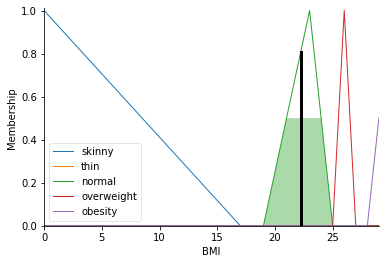

In [10]:
# Antecedent
sex = ctrl.Antecedent(np.arange(1,4,1), 'sex')
age = ctrl.Antecedent(np.arange(0,60,1), 'age')
calo = ctrl.Antecedent(np.arange(1000,3000,1), 'calo')
BMI = ctrl.Consequent(np.arange(0,30,1), 'BMI')

# BMI memberships
BMI['skinny'] = fuzz.trimf(BMI.universe, [0,0,17])
BMI['thin'] = fuzz.trimf(BMI.universe, [17,17.75,18])
BMI['normal'] = fuzz.trimf(BMI.universe, [19,23,25])
BMI['overweight'] = fuzz.trimf(BMI.universe, [26,26,27])
BMI['obesity'] = fuzz.trimf(BMI.universe, [28,30,30])
#BMI.view()

# Sex memberships
sex['male'] = fuzz.trimf(sex.universe, [0,1,2.1])
sex['female'] = fuzz.trimf(sex.universe, [0,1,2])
#sex.view()

# age memberships
age['child'] = fuzz.trimf(age.universe, [0,0,15])
age['adult'] = fuzz.trimf(age.universe, [15,30,60])
#age.view()

# calo memberships
calo['very low'] = fuzz.trimf(calo.universe, [1000,1000,1500])
calo['low'] = fuzz.trimf(calo.universe, [1400,1700,1900])
calo['medium'] = fuzz.trimf(calo.universe, [1900,2300,2500])
calo['high'] = fuzz.trimf(calo.universe, [2500,2600,2750])
calo['very high'] = fuzz.trimf(calo.universe, [2700,2900,3000])
#calo.view()

# rules
rule1 = ctrl.Rule(sex['male']& age['child']& calo['very low'], BMI['skinny'])
rule2 = ctrl.Rule(sex['male']& age['child']& calo['low'], BMI['thin'])
rule3 = ctrl.Rule(sex['male']& age['child']& calo['medium'], BMI['normal'])
rule4 = ctrl.Rule(sex['male']& age['child']& calo['high'], BMI['overweight'])
rule5 = ctrl.Rule(sex['male']& age['child']& calo['very high'], BMI['obesity'])
rule6 = ctrl.Rule(sex['male']& age['adult']& calo['very low'], BMI['thin'])
rule7 = ctrl.Rule(sex['male']& age['adult']& calo['low'], BMI['thin'])
rule8 = ctrl.Rule(sex['male']& age['adult']& calo['medium'], BMI['normal'])
rule9 = ctrl.Rule(sex['male']& age['adult']& calo['high'], BMI['overweight'])
rule10 = ctrl.Rule(sex['male']& age['adult']& calo['very high'], BMI['obesity'])
rule11 = ctrl.Rule(sex['female']& age['child']& calo['very low'], BMI['skinny'])
rule12 = ctrl.Rule(sex['female']& age['child']& calo['low'], BMI['skinny'])
rule13 = ctrl.Rule(sex['female']& age['child']& calo['medium'], BMI['thin'])
rule14 = ctrl.Rule(sex['female']& age['child']& calo['high'], BMI['normal'])
rule15 = ctrl.Rule(sex['female']& age['child']& calo['very high'], BMI['overweight'])
rule16 = ctrl.Rule(sex['female']& age['adult']& calo['very low'], BMI['thin'])
rule17 = ctrl.Rule(sex['female']& age['adult']& calo['low'], BMI['thin'])
rule18 = ctrl.Rule(sex['female']& age['adult']& calo['medium'], BMI['normal'])
rule19 = ctrl.Rule(sex['female']& age['adult']& calo['high'], BMI['overweight'])
rule20 = ctrl.Rule(sex['female']& age['adult']& calo['very high'], BMI['obesity'])


BMI_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20])
BMIing= ctrl.ControlSystemSimulation(BMI_ctrl)
BMIing.input['sex']=1.5
BMIing.input['age']=25
BMIing.input['calo']=2100
BMIing.compute()
print('Chỉ số BMI là:',BMIing.output['BMI'])
BMI.view(sim=BMIing)

321.65661136249463


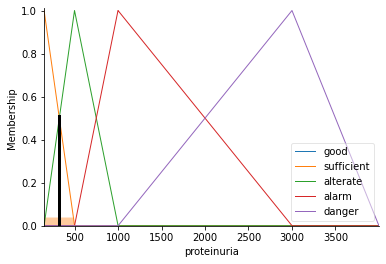

In [11]:
#Antecedent
glycaemia = ctrl.Antecedent(np.arange(70,150,0.1),'glycaemia')
sirolimus = ctrl.Antecedent(np.arange(0,20.1,0.1),'sirolimus')
proteinuria = ctrl.Consequent(np.arange(150,4000,1),'proteinuria')
     

# Glycaemia memberships
glycaemia['good']=fuzz.trimf(glycaemia.universe, [70,70,100])
glycaemia['alarm']=fuzz.trimf(glycaemia.universe, [70,100,126])
glycaemia['danger']=fuzz.trimf(glycaemia.universe, [126,150,150])
#glycaemia.view()

# siromus memberships
sirolimus['alarm_down']=fuzz.trimf(sirolimus.universe, [0,0,5])
sirolimus['sufficient']=fuzz.trimf(sirolimus.universe, [0,4,7])
sirolimus['good']=fuzz.trimf(sirolimus.universe, [6,7,12])
sirolimus['alarm_up']=fuzz.trimf(sirolimus.universe, [11,12,14])
sirolimus['danger']=fuzz.trimf(sirolimus.universe, [13,14,20])
#sirolimus.view()

# proteinurtia memberships
proteinuria['good']=fuzz.trimf(proteinuria.universe, [0,0,150])
proteinuria['sufficient']=fuzz.trimf(proteinuria.universe, [0,150,500])
proteinuria['alterate']=fuzz.trimf(proteinuria.universe, [150,500,1000])
proteinuria['alarm']=fuzz.trimf(proteinuria.universe, [500,1000,3000])
proteinuria['danger']=fuzz.trimf(proteinuria.universe, [1000,3000,4000])
#proteinuria.view()
     

#Rules
rule1 = ctrl.Rule(glycaemia['good']&sirolimus['good'], proteinuria['good'])
rule2 = ctrl.Rule(glycaemia['danger']&sirolimus['danger'], proteinuria['danger'])
rule3 = ctrl.Rule(glycaemia['good']&sirolimus['sufficient'], proteinuria['sufficient'])
rule4 = ctrl.Rule(glycaemia['alarm']&sirolimus['alarm_up'], proteinuria['alarm'])
rule5 = ctrl.Rule(glycaemia['alarm']&sirolimus['sufficient'], proteinuria['alterate'])
rule6 = ctrl.Rule(glycaemia['good']&sirolimus['alarm_up'], proteinuria['alterate'])
rule7 = ctrl.Rule(glycaemia['alarm']&sirolimus['good'], proteinuria['sufficient'])
rule8 = ctrl.Rule(glycaemia['good']&sirolimus['alarm_down'], proteinuria['sufficient'])

#Học các rule
proteinuria_control = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8])
     

#Simulation
proteinuria_simulation = ctrl.ControlSystemSimulation(proteinuria_control)
proteinuria_simulation.input['glycaemia'] = 125
proteinuria_simulation.input['sirolimus'] = 11
proteinuria_simulation.compute()
print(proteinuria_simulation.output['proteinuria'])
proteinuria.view(sim=proteinuria_simulation)

Kích thước: 12.58169934640523


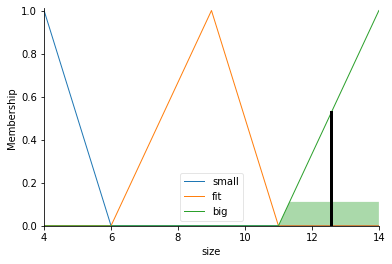

In [12]:

import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

# Antecedent
height = ctrl.Antecedent(np.arange(110, 165, 1), 'height')
chest = ctrl.Antecedent(np.arange(54, 83, 1), 'chest')
waist = ctrl.Antecedent(np.arange(55, 68, 4), 'waist')
size = ctrl.Consequent(np.arange(4, 15 , 1), 'size')

# size memberships
size['small'] = fuzz.trimf(size.universe, [4, 4, 6])
size['fit'] = fuzz.trimf(size.universe, [6, 9, 11])
size['big'] = fuzz.trimf(size.universe, [11, 14, 14])
#size.view()

# height memberships
height['short'] = fuzz.trimf(height.universe, [110, 110, 123])
height['medium'] = fuzz.trimf(height.universe, [123, 135, 147])
height['tall'] = fuzz.trimf(height.universe, [147, 156,165])
#height.view()

# chest memberships
chest['small'] = fuzz.trimf(chest.universe, [58, 58, 63])
chest['medium'] = fuzz.trimf(chest.universe, [63, 70, 75])
chest['large'] = fuzz.trimf(chest.universe, [75, 79, 83])
#chest.view()

# waist memberships
waist['small'] = fuzz.trimf(waist.universe, [55, 55, 58])
waist['medium'] = fuzz.trimf(waist.universe, [58, 61, 65])
waist['large'] = fuzz.trimf(waist.universe, [65, 66, 68])
#waist.view()

# Rules
rule1 = ctrl.Rule(height['short'] & chest['small'] & waist['small'], size['small'])
rule2 = ctrl.Rule(height['short'] & chest['small'] & waist['medium'], size['small'])
rule3 = ctrl.Rule(height['short'] & chest['small'] & waist['large'], size['fit'])
rule4 = ctrl.Rule(height['short'] & chest['medium'] & waist['small'], size['small'])
rule5 = ctrl.Rule(height['short'] & chest['medium'] & waist['medium'], size['fit'])
rule6 = ctrl.Rule(height['short'] & chest['medium'] & waist['large'], size['fit'])
rule7 = ctrl.Rule(height['short'] & chest['large'] & waist['small'], size['fit'])
rule8 = ctrl.Rule(height['short'] & chest['large'] & waist['medium'], size['fit'])
rule9 = ctrl.Rule(height['short'] & chest['large'] & waist['large'], size['fit'])
rule10 = ctrl.Rule(height['medium'] & chest['small'] & waist['small'], size['small'])
rule11 = ctrl.Rule(height['medium'] & chest['small'] & waist['medium'], size['fit'])
rule12 = ctrl.Rule(height['medium'] & chest['small'] & waist['large'], size['fit'])
rule13 = ctrl.Rule(height['medium'] & chest['medium'] & waist['small'], size['fit'])
rule14 = ctrl.Rule(height['medium'] & chest['medium'] & waist['medium'], size['fit'])
rule15 = ctrl.Rule(height['medium'] & chest['medium'] & waist['large'], size['big'])
rule16 = ctrl.Rule(height['medium'] & chest['large'] & waist['small'], size['fit'])
rule17 = ctrl.Rule(height['medium'] & chest['large'] & waist['medium'], size['big'])
rule18 = ctrl.Rule(height['medium'] & chest['large'] & waist['large'], size['big'])
rule19 = ctrl.Rule(height['tall'] & chest['small'] & waist['small'], size['small'])
rule20 = ctrl.Rule(height['tall'] & chest['small'] & waist['medium'], size['small'])
rule21 = ctrl.Rule(height['tall'] & chest['small'] & waist['large'], size['fit'])
rule22 = ctrl.Rule(height['tall'] & chest['medium'] & waist['small'], size['fit'])
rule23 = ctrl.Rule(height['tall'] & chest['medium'] & waist['medium'], size['fit'])
rule24 = ctrl.Rule(height['tall'] & chest['medium'] & waist['large'], size['big'])
rule25 = ctrl.Rule(height['tall'] & chest['large'] & waist['small'], size['fit'])
rule26 = ctrl.Rule(height['tall'] & chest['large'] & waist['medium'], size['big'])
rule27 = ctrl.Rule(height['tall'] & chest['large'] & waist['large'], size['big'])

# Học luật
size_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule9,rule20,rule21,rule22,rule23,rule24,rule25,rule26,rule27])
sizing= ctrl.ControlSystemSimulation(size_ctrl)
sizing.input['height'] = 175
sizing.input['chest'] = 80
sizing.input['waist'] = 70

sizing.compute()
print('Kích thước:',sizing.output['size'])
size.view(sim=sizing)